<a href="https://colab.research.google.com/github/lsellers11/Black-Holes/blob/main/higgsplotscipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

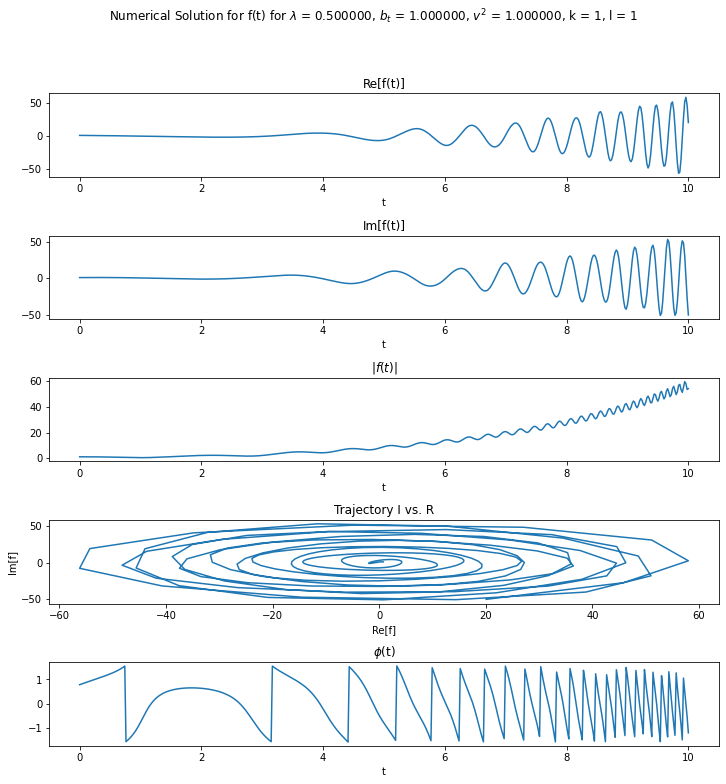

In [ ]:
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
from tabulate import tabulate
import scipy.integrate as scint

### Parameters
N = 1000;
dt = 10**(-5);
lamb = .5;
v2 = 1;
k = 1;
l = 1;
bt = 1;
bx = -1/2**0.5;
by = -1/2**0.5;
# C = complex(k**2 + l**2 - lamb/2 * v2, - (bx*k + by*l));

### Define RHS of Coupled System
def rhsf(F, t):
    Rv = F[0];
    R = F[1];
    Iv = F[2];
    I = F[3];
    
    dRvdt = bt*Rv - lamb/2*(R**2 + I**2)*R - ((k**2+l**2-lamb/2*v2)*R + (bx*k+by*l)*I);
    dRdt = Rv;
    dIvdt = bt*Iv - lamb/2*(R**2 + I**2)*I + ((bx*k+by*l)*R - (k**2+l**2-lamb/2*v2)*I);
    dIdt = Iv;
    
    return np.array([dRvdt, dRdt, dIvdt, dIdt]);

t = np.linspace(0, 10, 500);
F0 = np.zeros(4);
### Initial Position
theta1 = pi/4;
r = 1.1*v2;
if v2 < 0:
  r = -1*v2;
F0[1] = r*cos(theta1);
F0[3] = r*sin(theta1);
### Initial Velocity
theta2 = 3*pi/4;
v = 1.0;
F0[0] = v*cos(theta2);
F0[2] = v*sin(theta2);
F = scint.odeint(rhsf, F0, t);
# F = scint.solve_ivp(rhsf, (0, 50), F0);

Rv = F[:, 0];
R = F[:, 1];
Iv = F[:, 2];
I = F[:, 3];
fnorm = np.power(R**2 + I**2, 0.5);

### Plots
fig, ax = plt.subplots(5, figsize = (12,12));
plt.subplots_adjust(hspace = .7);
fig.suptitle('Numerical Solution for f(t) for $\lambda$ = %f, $b_{t}$ = %f, $v^{2}$ = %f, k = %d, l = %d'%(lamb, bt, v2, k, l));
ax[0].plot(t, R, label = 'R(t)');
ax[0].set_xlabel('t');
ax[0].set_title('Re[f(t)]');

ax[1].plot(t, I, label = 'I(t)');
ax[1].set_xlabel('t');
ax[1].set_title('Im[f(t)]');

ax[2].plot(t, fnorm, label = '$|f(t)|$');
ax[2].set_xlabel('t');
ax[2].set_title('$|f(t)|$');

ax[3].plot(R, I)
ax[3].set_xlabel('Re[f]');
ax[3].set_ylabel('Im[f]');
ax[3].set_title('Trajectory I vs. R')

ax[4].plot(t, np.arctan(I/R), label = '$\phi$(t)');
ax[4].set_xlabel('t');
ax[4].set_title('$\phi$(t)');

plt.show()